In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
#df=pd.read_csv("merged_gemoma_output_hordein.count",header=None,delimiter='\t',skipinitialspace = True)
#df=pd.read_csv("merged_gemoma_output_haoluo2.count",header=None,delimiter='\t',skipinitialspace = True)
#df=pd.read_csv("merged_gemoma_output_phenology2.count",header=None,delimiter='\t',skipinitialspace = True)
#df=pd.read_csv("merged_gemoma_output_root_structure.count",header=None,delimiter='\t',skipinitialspace = True)
#df=pd.read_csv("merged_gemoma_output_AMY6H.count",header=None,delimiter='\t',skipinitialspace = True)
#df=pd.read_csv("merged_gemoma_output_BLP.count",header=None,delimiter='\t',skipinitialspace = True)
df=pd.read_csv("merged_gemoma_output_CBHfertility.count",header=None,delimiter='\t',skipinitialspace = True)
df.head()

,0,1,2,3
0,HORVU.MOREX.r3.1HG0008320.1,4,10TJ18,D
1,HORVU.MOREX.r3.1HG0009400.1,1,10TJ18,D
2,HORVU.MOREX.r3.1HG0010090.1,0,10TJ18,D
3,HORVU.MOREX.r3.1HG0044470.1,1,10TJ18,D
4,HORVU.MOREX.r3.1HG0059670.1,1,10TJ18,D


In [3]:
df.columns=['gene','copy','var','type']
df['gene'] = df['gene'].str.replace('HORVU.MOREX.r3.','')
df.head()

/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,gene,copy,var,type
0,1HG0008320.1,4,10TJ18,D
1,1HG0009400.1,1,10TJ18,D
2,1HG0010090.1,0,10TJ18,D
3,1HG0044470.1,1,10TJ18,D
4,1HG0059670.1,1,10TJ18,D


In [4]:
##strip space
for col in ['gene', 'var', 'type']:
    df[col] = df[col].str.strip()

In [5]:
len(df.gene.unique())

129

In [6]:
sns.color_palette("bright")

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [7]:
colors = sns.color_palette("bright")

## quick lineplot

In [8]:
## calculate mean for D and W for each gene
df_mean = df.groupby(['gene','type'])['copy'].agg(["mean","std","count"]).reset_index()
df_mean.head()

,gene,type,mean,std,count
0,1HG0008320.1,D,1.716981,1.276675,53
1,1HG0008320.1,W,1.000000,1.044466,23
2,1HG0009400.1,D,3.962264,2.688739,53
3,1HG0009400.1,W,1.869565,1.604096,23
4,1HG0010090.1,D,0.018868,0.137361,53


In [9]:
## split D and W and merge in same row
df_meanD= df_mean[df_mean['type'] == 'D']
df_meanW= df_mean[df_mean['type'] == 'W']
df_mean_merge = df_meanD.merge(df_meanW,how='left',on='gene')
df_mean_merge.head()

,gene,type_x,mean_x,std_x,count_x,type_y,mean_y,std_y,count_y
0,1HG0008320.1,D,1.716981,1.276675,53,W,1.000000,1.044466,23
1,1HG0009400.1,D,3.962264,2.688739,53,W,1.869565,1.604096,23
2,1HG0010090.1,D,0.018868,0.137361,53,W,0.130435,0.344350,23
3,1HG0044470.1,D,1.000000,0.000000,53,W,1.000000,0.000000,23
4,1HG0059670.1,D,1.000000,0.000000,53,W,1.000000,0.000000,23


In [10]:
## calculate D to W ratio
df_mean_merge['ratio'] = df_mean_merge['mean_x'] / df_mean_merge['mean_y']
df_mean_merge = df_mean_merge.sort_values('gene')

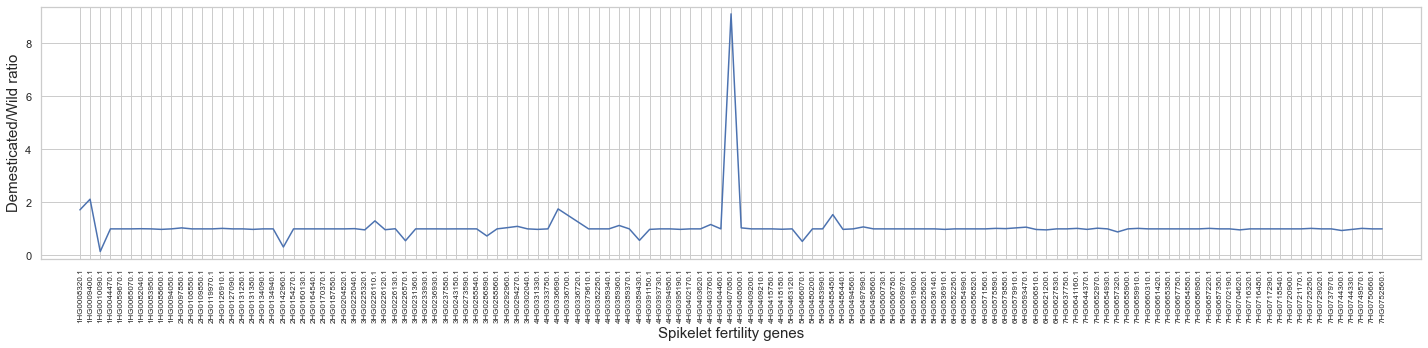

In [13]:
sns.set_theme()
sns.set_theme(style="whitegrid")
fig,ax=plt.subplots(1,1,figsize=(20,5))
## line plot of D/W ratio for each gene
sns.lineplot(ax = ax, data=df_mean_merge, x="gene", y="ratio")
plt.setp(ax.get_xticklabels(), fontsize=8,rotation=90)
plt.xlabel("Spikelet fertility genes",fontsize=15)
plt.ylabel("Demesticated/Wild ratio",fontsize=15)
plt.margins(0.03)
plt.tight_layout()
plt.savefig("Fertility_distribution_ratio.png",dpi=500,bbox_inches = 'tight')

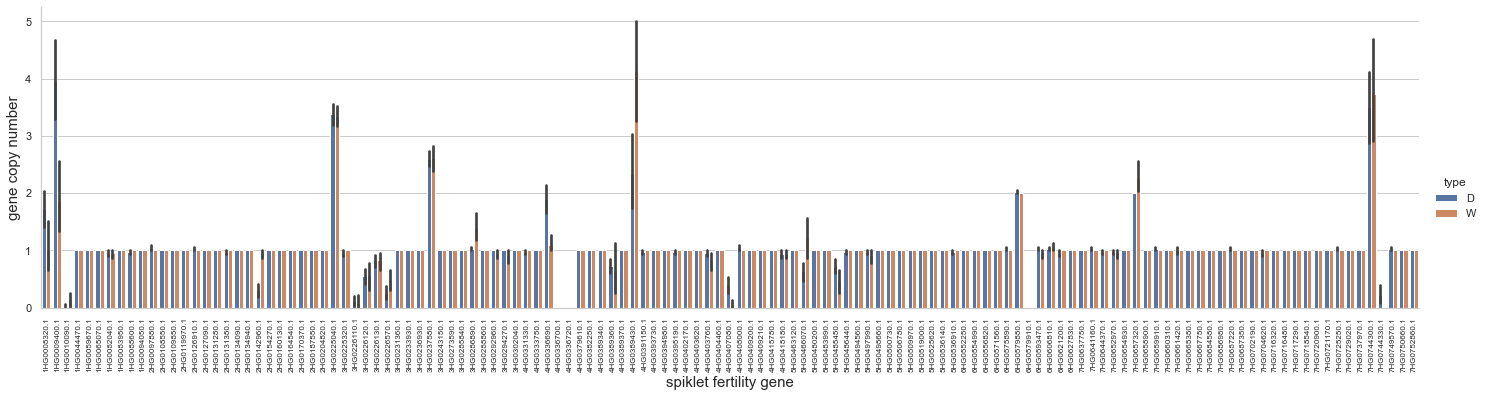

In [14]:
sns.set_theme()
sns.set_theme(style="whitegrid")
g = sns.catplot(data=df, kind="bar",
    x="gene", y="copy", hue="type",
    height=5, aspect=20/5
)
g.set_axis_labels("spiklet fertility gene", "gene copy number",fontsize=15)
plt.xticks(rotation=90,fontsize=8)
plt.show()

In [15]:
g.savefig("test_Fertility_distribution.png",dpi=500,bbox_inches = 'tight')

## quick category plot

In [27]:
df.head()

,gene,copy,var,type
0,1HG0008320.1,4,10TJ18,D
1,1HG0009400.1,1,10TJ18,D
2,1HG0010090.1,0,10TJ18,D
3,1HG0044470.1,1,10TJ18,D
4,1HG0059670.1,1,10TJ18,D


/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


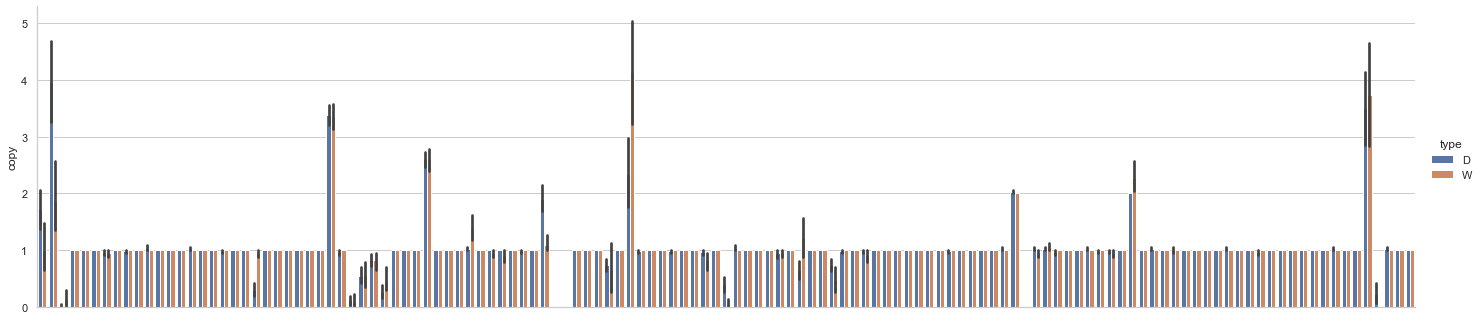

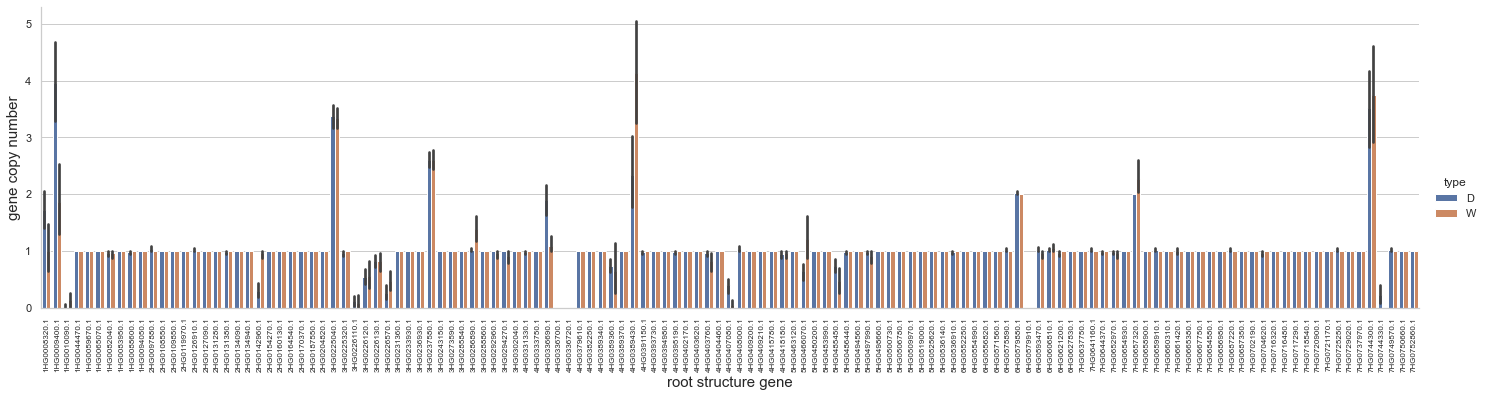

In [28]:
### barplot using catplot (category plot)
sns.set_theme(style="whitegrid")
fig,ax=plt.subplots(2,1,figsize=(20,10),sharex=True)
# catplot

g0 = sns.catplot(ax=ax[0], data=df, kind="bar",
    x="gene", y="copy", hue="type",
    height=5, aspect=20/5
)
g0.set_xticklabels("")
g0.set_axis_labels("")

g1 = sns.catplot(ax=ax[1], data=df, kind="bar",
    x="gene", y="copy", hue="type",
    height=5, aspect=20/5
)
g.despine(left=True)
#g.set_axis_labels("root structure gene", "gene copy number",fontsize=15)
g1.set_axis_labels("root structure gene", "gene copy number",fontsize=15)
plt.xticks(rotation=90,fontsize=8)

plt.close(0)
plt.close(1)

In [30]:
fig.savefig("test_Fertility_distribution.png",dpi=500)

## polar bar plot

In [147]:
df_tem.head()

,gene,copy,var,type,label_color
52,6HG0617430.1,8,FT880,W,red
151,6HG0617430.1,7,HOR3365,D,black
1,6HG0617430.1,6,10TJ18,D,black
166,6HG0617430.1,6,HOR7172,D,black
61,6HG0617430.1,6,HID055,W,red


In [171]:
df_tem = df_tem.reset_index(drop=True)
df_tem['label'] = df_tem['var'] + " = " + df_tem['copy'].astype(str)
df_tem.head()

,gene,copy,var,type,label_color,label
0,6HG0617430.1,8,FT880,W,red,FT880 = 8
1,6HG0617430.1,7,HOR3365,D,black,HOR3365 = 7
2,6HG0617430.1,6,10TJ18,D,black,10TJ18 = 6
3,6HG0617430.1,6,HOR7172,D,black,HOR7172 = 6
4,6HG0617430.1,6,HID055,W,red,HID055 = 6


<function matplotlib.pyplot.show(close=None, block=None)>

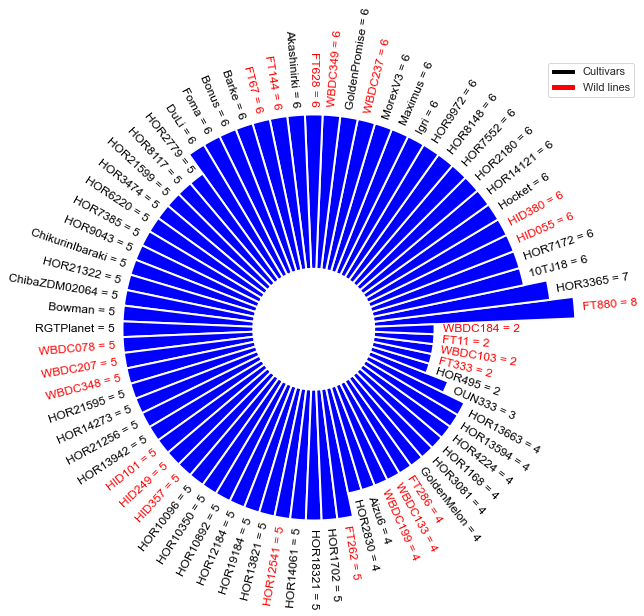

In [172]:
# initialize the figure
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df_tem['copy'].max()
min = df_tem['copy'].min()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (upperLimit - lowerLimit) / (max - min)
heights = slope * (df_tem['copy'] - min) + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_tem.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_tem.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="blue",
)

## colors
colors = df_tem.label_color.to_list()
# Add labels
for bar, angle, height, label, color in zip(bars, angles, heights, df_tem["label"], colors):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        color=color) 
# add legend
Dlabel = mpatches.Patch(color='black', label='Cultivars')
Wlabel = mpatches.Patch(color='red', label='Wild lines')
plt.legend(handles=[Dlabel,Wlabel],handleheight=0.1, handlelength=2, bbox_to_anchor=(1.1,1))
plt.show

In [173]:
fig.savefig("AMY_gene_polar_sort1.png",dpi=300,bbox_inches = 'tight')

## group by type D/W

In [174]:
df_tem2 = df_tem.sort_values(['type','copy'])
df_tem2 = df_tem2.reset_index(drop=True)
df_tem2.head()

,gene,copy,var,type,label_color,label
0,6HG0617430.1,2,HOR495,D,black,HOR495 = 2
1,6HG0617430.1,3,OUN333,D,black,OUN333 = 3
2,6HG0617430.1,4,HOR2830,D,black,HOR2830 = 4
3,6HG0617430.1,4,Aizu6,D,black,Aizu6 = 4
4,6HG0617430.1,4,GoldenMelon,D,black,GoldenMelon = 4


<function matplotlib.pyplot.show(close=None, block=None)>

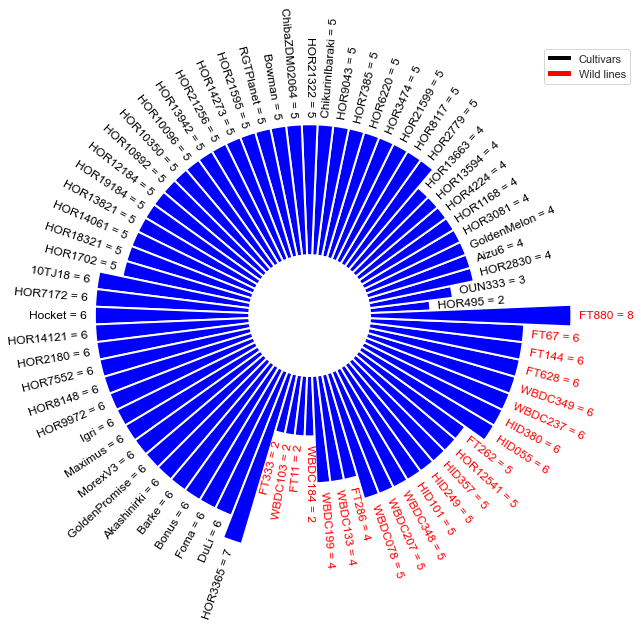

In [175]:
# initialize the figure
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df_tem2['copy'].max()
min = df_tem2['copy'].min()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (upperLimit - lowerLimit) / (max - min)
heights = slope * (df_tem2['copy'] - min) + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_tem2.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_tem2.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="blue",
)

## colors
colors = df_tem2.label_color.to_list()
# Add labels
for bar, angle, height, label, color in zip(bars, angles, heights, df_tem2["label"], colors):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        color=color) 

# add legend
Dlabel = mpatches.Patch(color='black', label='Cultivars')
Wlabel = mpatches.Patch(color='red', label='Wild lines')
plt.legend(handles=[Dlabel,Wlabel],handleheight=0.1, handlelength=2, bbox_to_anchor=(1.1,1))
plt.show

In [176]:
fig.savefig("AMY_gene_polar_sort2.png",dpi=300,bbox_inches = 'tight')